In [0]:
!pip install shap

    100% |████████████████████████████████| 204kB 7.4MB/s 
  Running setup.py bdist_wheel for shap ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/3f/cb/58/2482f534eb1c1f9ac93653887aee5b6ea83718ef041c1310bd
Successfully built shap


In [0]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [0]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X)

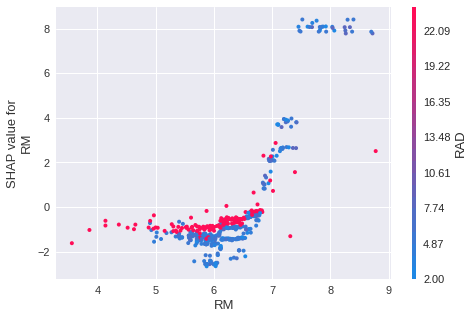

In [0]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.initjs()
shap.dependence_plot("RM", shap_values, X)

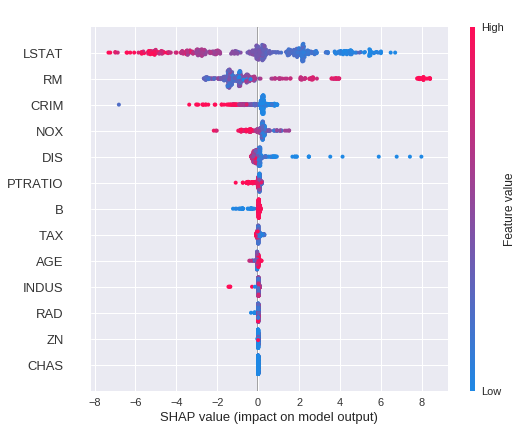

In [0]:
# summarize the effects of all the features
shap.initjs()
shap.summary_plot(shap_values, X)

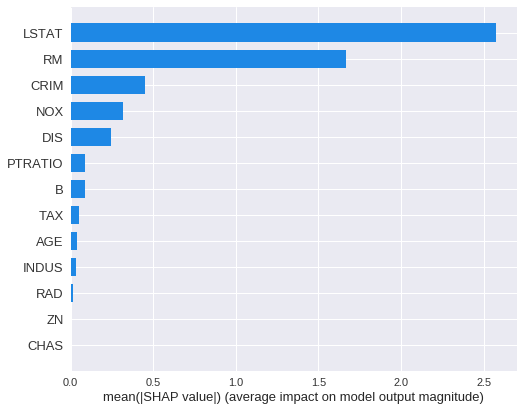

In [0]:
shap.summary_plot(shap_values, X, plot_type="bar")
